# Spectral Centroid and Spectral Bandwidth

In [1]:
# Import necessary libraries
import librosa
import librosa.display as ld
import matplotlib.pyplot as plt
import numpy as np

Load in all necessary data and imports

In [19]:
# Load data
star, rate = librosa.load('./slices/star.wav')

Call functions on the data in order to translate it to spectral centroid and spectral bandwidth formats

In [27]:
spec_cent = librosa.feature.spectral_centroid(star, rate)
specto, phase = librosa.magphase(librosa.stft(star))
spec_bw = librosa.feature.spectral_bandwidth(star, rate)
bw_times = librosa.times_like(spec_bw)

Plot out the centroid and bandwidth

/mnt/b/anaconda3/envs/echoes/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/mnt/b/anaconda3/envs/echoes/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/mnt/b/anaconda3/envs/echoes/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


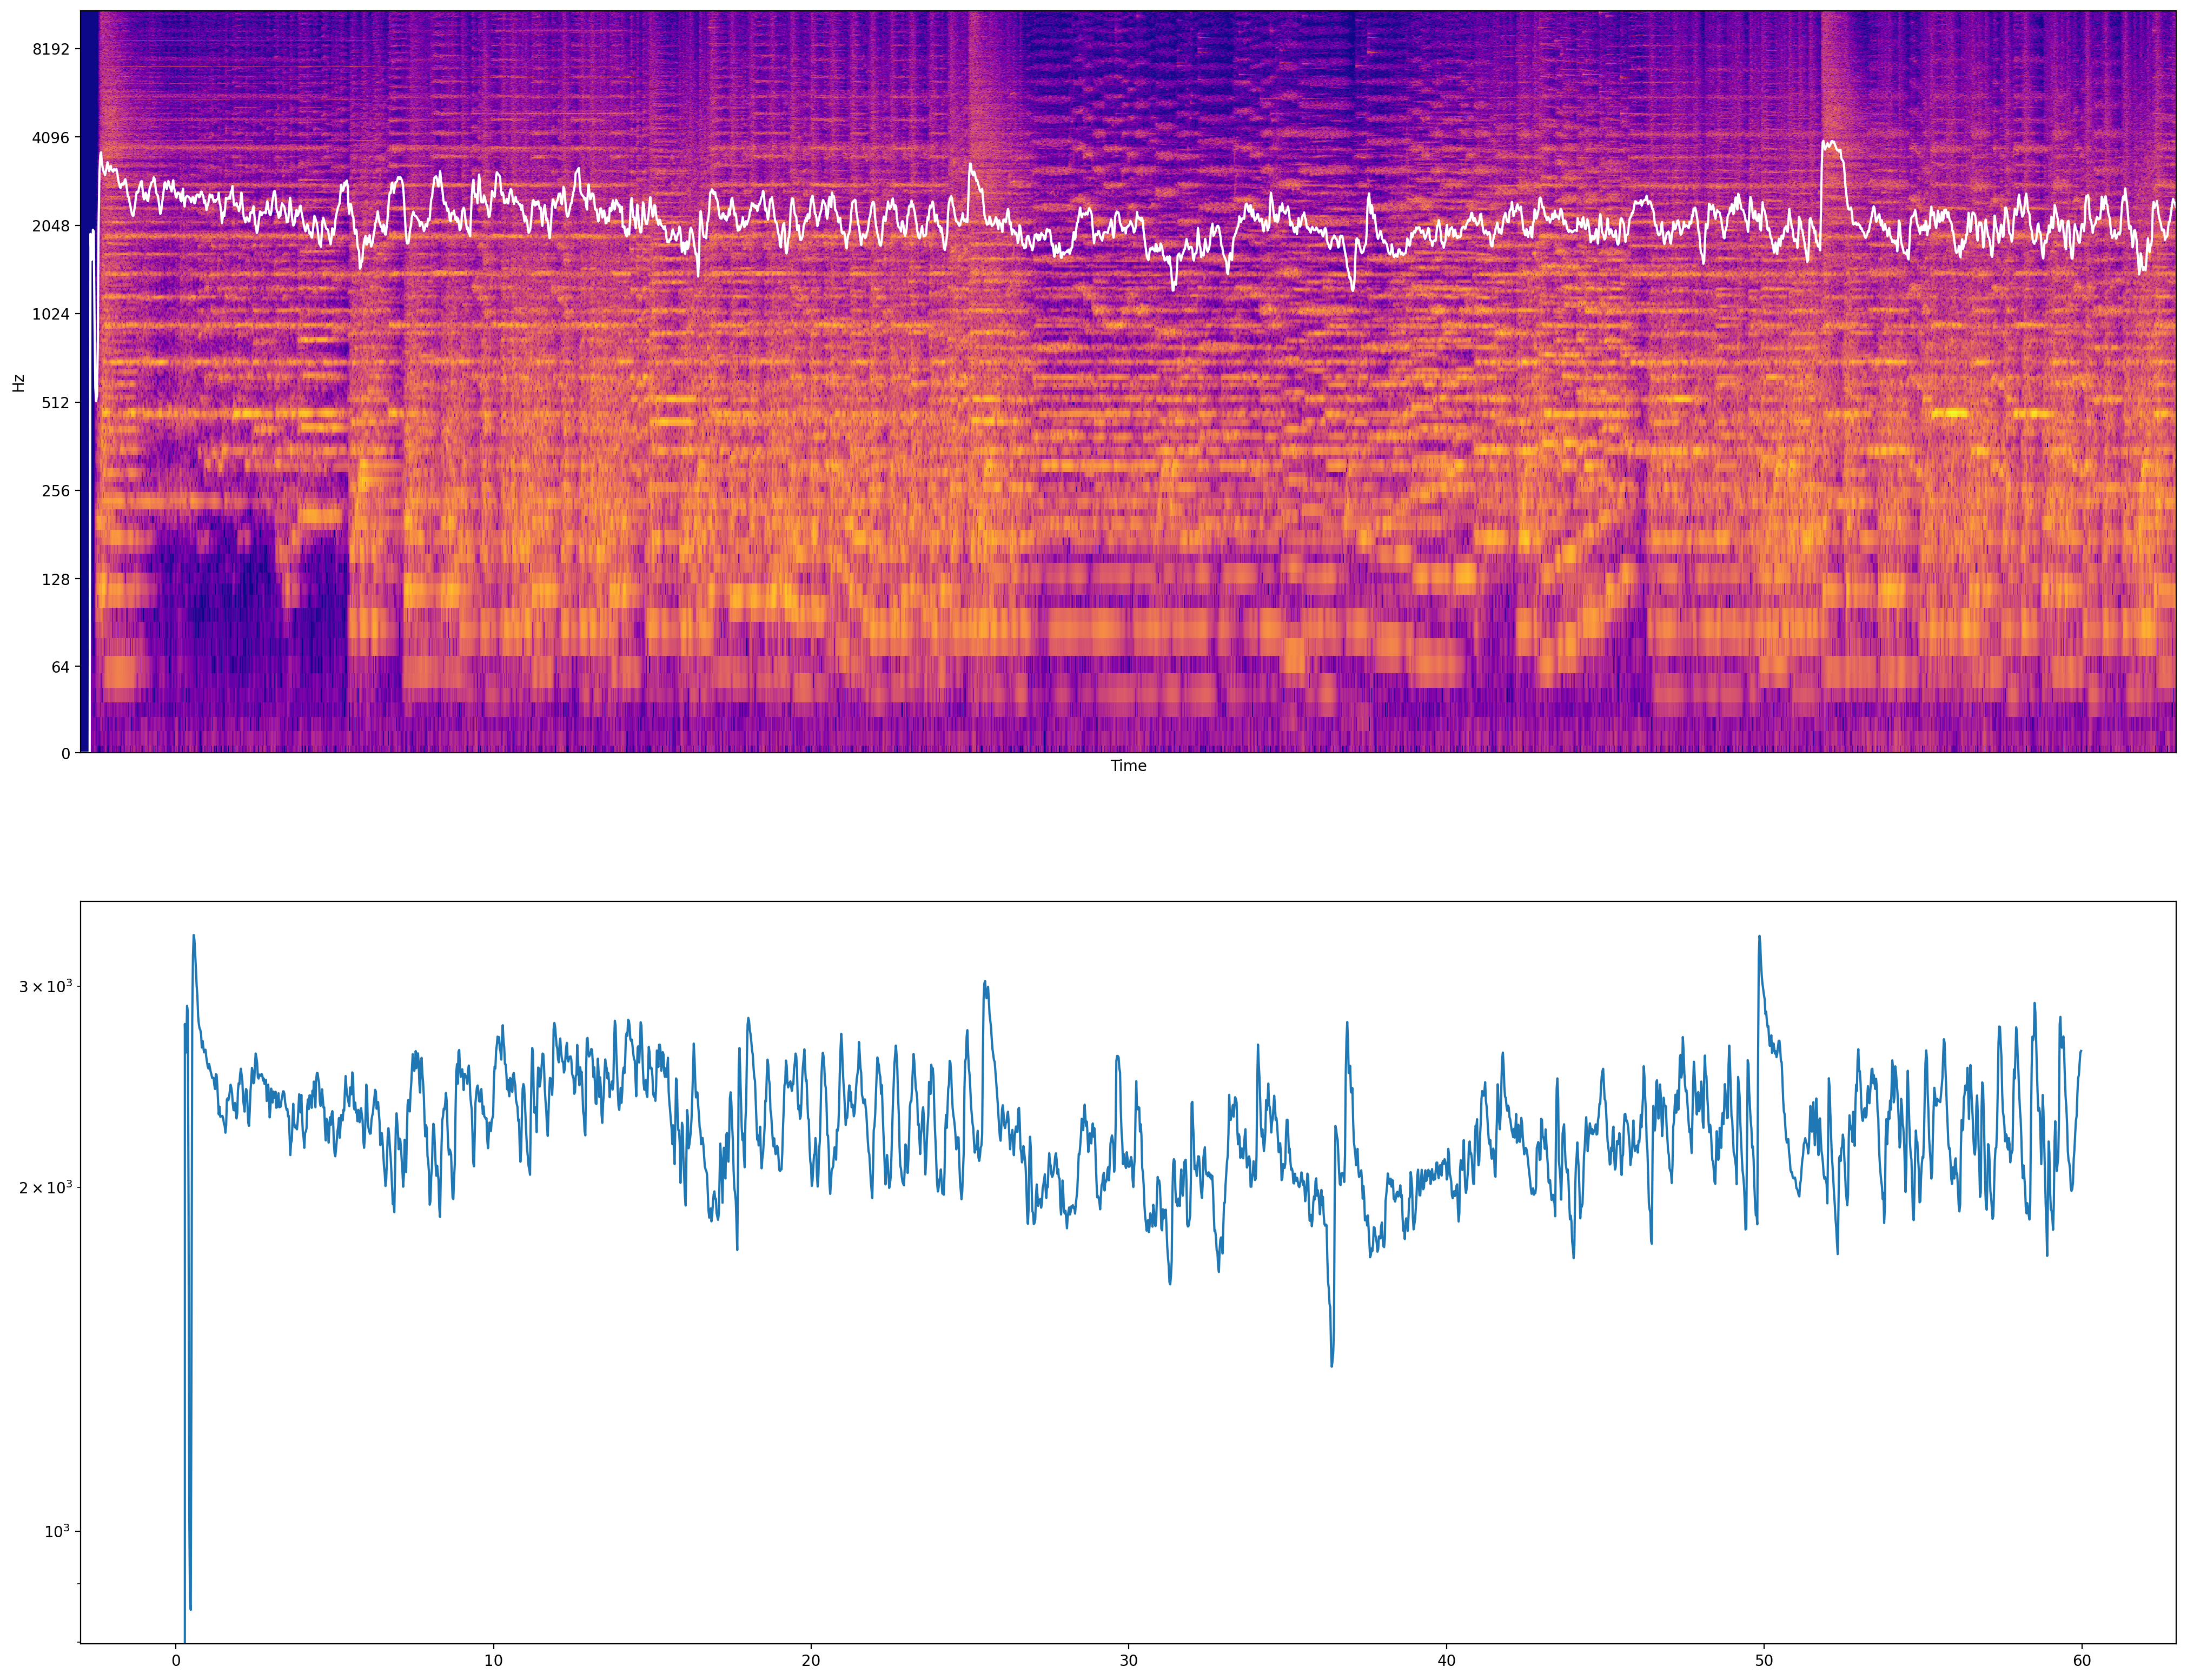

In [28]:
fig, ax = plt.subplots(2,1, figsize = (25, 20), dpi = 200)
ld.specshow(librosa.amplitude_to_db(specto, ref=np.max), y_axis='log', x_axis='time', ax=ax[0], cmap='plasma')
ax[0].plot(librosa.times_like(spec_cent),spec_cent.T, color='w')
ax[0].set(ylabel='Hz', xticks=[], xlim=[bw_times.min(), bw_times.max()])
ax[1].semilogy(bw_times, spec_bw[0], label="Spectral Bandwidth")